# Para esta Tarea

Utiliza el archivo de ventas de videojuegos  vgsales.csv, disponible en Kaggle, para realizar un análisis exploratorio de datos:

Con lo aprendido hasta el momento, generar un análisis completo de Exploratory Data Analysis (EDA) aplicado al archivo que contenga por lo menos 

- Lectura del archivo, head, tail, sample, describe.  Validación de columnas numéricas para que funcione con todas.  

- Elementos mínimos:

    Totales: 

    1) Total de videojuegos analizados,

    2) total de géneros analizados,

    3) Plataformas analizadas

    Ventas:
    
    1) Total de ventas por año,
    
    2) Juegos más vendidos por año,
    
    3) Plataformas con más ingresos por año. 
    
    Todos estos números desglosados por ingreso:
    
    NA, EU, JP, Otros y el Global,
    
    4) Gráfico de comparación de ventas entre géneros por año, 
    
    Insights: 2 Gráficos adicionales interesantes

---

Revisar el EDA del ejercicio anterior y añadir siguientes elementos, basados en los últimos 4 años

Crecimiento:

1) qué género ha tenido el mayor y menor crecimiento,

2) qué plataforma ha tenido el mayor y menor crecimiento,

3) qué videojuego ha tenido el mayor y menor crecimiento

2 elementos adicionales que muestren oportunidades de mercado

---

Por cada ejercicio es necesario realizar el código en Python utilizando la función estudiada.

Generar una presentación en Google Slides de máximo 7 slides, donde se seleccionarán los gráficos y análisis principales.  El formato tendrá máximo 2 gráficos por slide y una explicación de 3-4 líneas, además de una conclusión final.

## Importacion de librerias

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Lectura del archivo

In [17]:
df = pd.read_csv('../../Archivos-Analisis/files-tarea-m33/vgsales.csv')
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

Notaciones rapidas: Cambio de tipo de dato en las siguientes columnas, 

    - Col Year pasar a tipo int, ya que maneja floats, cosa que no debe de ser asi
    - Col Genre, Name, Platform y Publisher pasar a tipo string para mejor manejo de la informacion

In [12]:
df.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
df.tail(5)

In [ ]:
df.sample(5)

In [ ]:
df.describe()

In [11]:
df.shape

(16598, 11)

## Deteccion de valores nulos

In [24]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [23]:
# Obtencion de valores que cuenten con datos nulos
df[df.isnull().any(axis=1)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01
16493,16496,The Smurfs,3DS,NaN,Action,Unknown,0.00,0.01,0.00,0.00,0.01
16494,16497,Legends of Oz: Dorothy's Return,3DS,2014.0,Puzzle,NaN,0.00,0.01,0.00,0.00,0.01
16543,16546,Driving Simulator 2011,PC,2011.0,Racing,NaN,0.00,0.01,0.00,0.00,0.01


### Drop de valores nulos

In [25]:
df.dropna(inplace=True)

In [26]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

## Masajeo de datos
De acuerdo a las notas marcadas, procederemos a hacer el masajeo de datos correspondiente para mejorar el analisis

In [ ]:
# Col Year pasar a tipo int, ya que maneja floats, cosa que no debe de ser asi
# df['Year'] = df['Year'].astype('string')
df['Year'] = df['Year'].astype('int')

# Col Genre y Publisher pasar a tipo string para mejor manejo de la informacion
df['Genre'] = df['Genre'].astype('string')
df['Publisher'] = df['Publisher'].astype('string')
df['Name'] = df['Name'].astype('string')
df['Platform'] = df['Platform'].astype('string')

In [ ]:
# Corroboramos
df.dtypes

Rank                     int64
Name            string[python]
Platform        string[python]
Year                     int64
Genre           string[python]
Publisher       string[python]
NA_Sales               float64
EU_Sales               float64
JP_Sales               float64
Other_Sales            float64
Global_Sales           float64
dtype: object

## Analisis Basico

### Totales

1) Total de videojuegos analizados.

2) total de géneros analizados.

3) Plataformas analizadas.


#### Analisis

In [123]:
# Total de Titulos agrupados por Generos
total_games_gen = df.groupby('Genre')['Genre'].count().rename('Num de Videojuegos')
total_games_gen

Genre
Action          3251
Adventure       1274
Fighting         836
Misc            1686
Platform         875
Puzzle           570
Racing          1225
Role-Playing    1470
Shooter         1282
Simulation       848
Sports          2304
Strategy         670
Name: Num de Videojuegos, dtype: int64

<Axes: ylabel='Genre'>

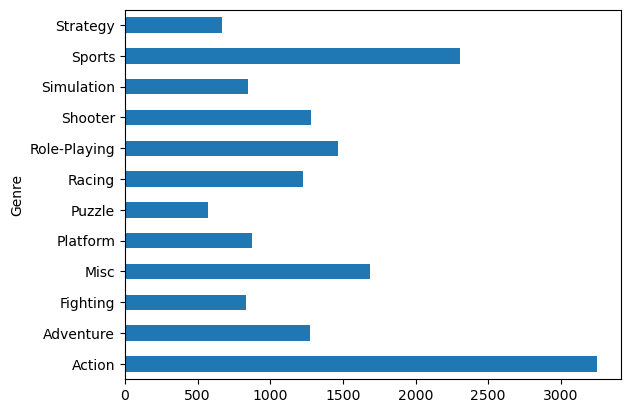

In [124]:
total_games_gen.plot.barh()

In [125]:
# Numero de titulos lanzados por año, agrupados por genero
pvt_total_games_gen = pd.pivot_table(df, values='Name', index='Genre', columns='Year', aggfunc='count', fill_value=0)

pvt_total_games_gen


Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020
Genre,,,,,,,,,,,,,,,,,,,,,
Action,1,25,18,7,1,2,6,2,2,2,...,272,226,239,265,148,186,255,118,1,0
Adventure,0,0,0,1,0,0,0,1,0,0,...,141,154,108,58,60,75,54,33,0,0
Fighting,1,0,0,0,0,1,0,2,0,0,...,53,40,50,29,20,23,21,14,0,0
Misc,4,0,1,1,1,0,0,0,0,1,...,207,201,184,38,42,41,39,18,0,0
Platform,0,3,5,5,1,4,6,2,4,3,...,29,31,37,11,37,10,14,10,0,0
Puzzle,0,2,3,1,3,4,0,0,1,5,...,79,45,43,11,3,7,6,0,0,0
Racing,0,1,2,0,3,0,1,0,1,0,...,84,57,64,30,16,27,19,20,0,0
Role-Playing,0,0,0,0,0,0,1,3,3,2,...,103,103,95,78,71,90,78,40,2,0
Shooter,2,10,5,1,3,1,4,2,1,1,...,91,81,94,48,59,47,34,32,0,0


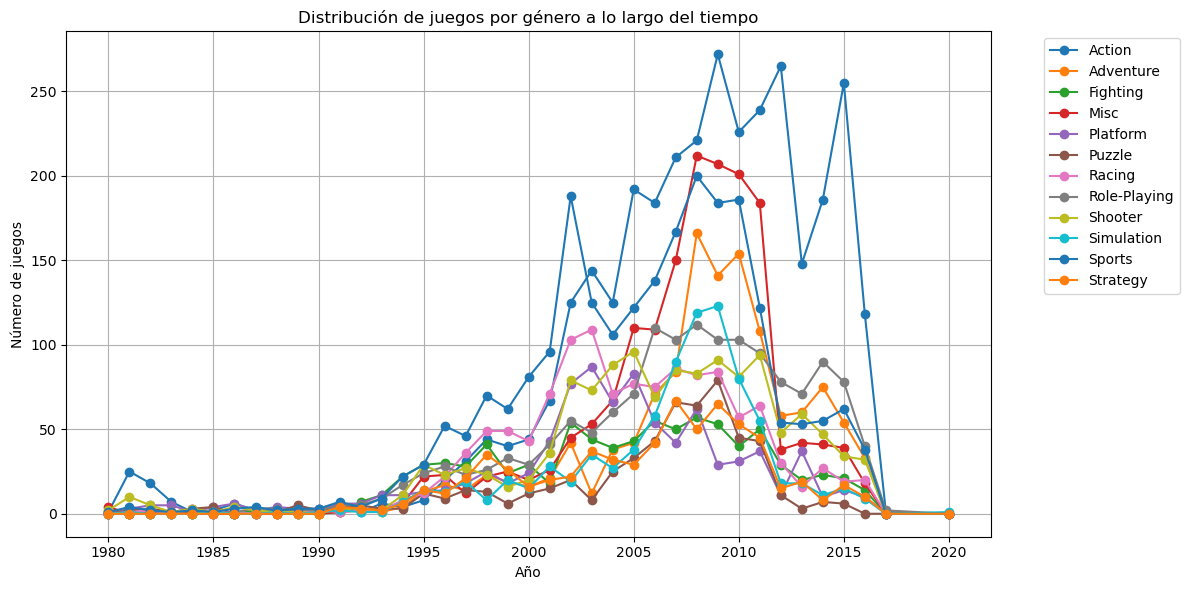

In [126]:
# Grafico de los generos con mayor crecimiento
plt.figure(figsize=(12, 6))

# Creacion del grafico plot line del crecimiento por genero
for genre in total_games_gen.index:
    plt.plot(pvt_total_games_gen.columns, pvt_total_games_gen.loc[genre], label=genre, marker='o')

plt.title('Distribución de juegos por género a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Número de juegos')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

In [175]:
# Adicion de la columna Total
pvt_total_games_gen_total = pvt_total_games_gen
pvt_total_games_gen_total['Total'] = pvt_total_games_gen.sum(axis=1)
pvt_total_games_gen_total

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2010,2011,2012,2013,2014,2015,2016,2017,2020,Total
Genre,,,,,,,,,,,,,,,,,,,,,
Action,1,25,18,7,1,2,6,2,2,2,...,226,239,265,148,186,255,118,1,0,3251
Adventure,0,0,0,1,0,0,0,1,0,0,...,154,108,58,60,75,54,33,0,0,1274
Fighting,1,0,0,0,0,1,0,2,0,0,...,40,50,29,20,23,21,14,0,0,836
Misc,4,0,1,1,1,0,0,0,0,1,...,201,184,38,42,41,39,18,0,0,1686
Platform,0,3,5,5,1,4,6,2,4,3,...,31,37,11,37,10,14,10,0,0,875
Puzzle,0,2,3,1,3,4,0,0,1,5,...,45,43,11,3,7,6,0,0,0,570
Racing,0,1,2,0,3,0,1,0,1,0,...,57,64,30,16,27,19,20,0,0,1225
Role-Playing,0,0,0,0,0,0,1,3,3,2,...,103,95,78,71,90,78,40,2,0,1470
Shooter,2,10,5,1,3,1,4,2,1,1,...,81,94,48,59,47,34,32,0,0,1282


In [176]:
# Plataformas mas jugadas
plat_games = df.groupby('Platform')['Platform'].count().sort_values(ascending=False)
plat_games

Platform
DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
GC       542
3DS      499
PSV      410
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

In [174]:
# Creacion de la tabla pivot de las plataformas con mayor crecimiento
platform_sales = pd.pivot_table(df, values='Global_Sales', index='Platform',columns='Year',aggfunc='sum')

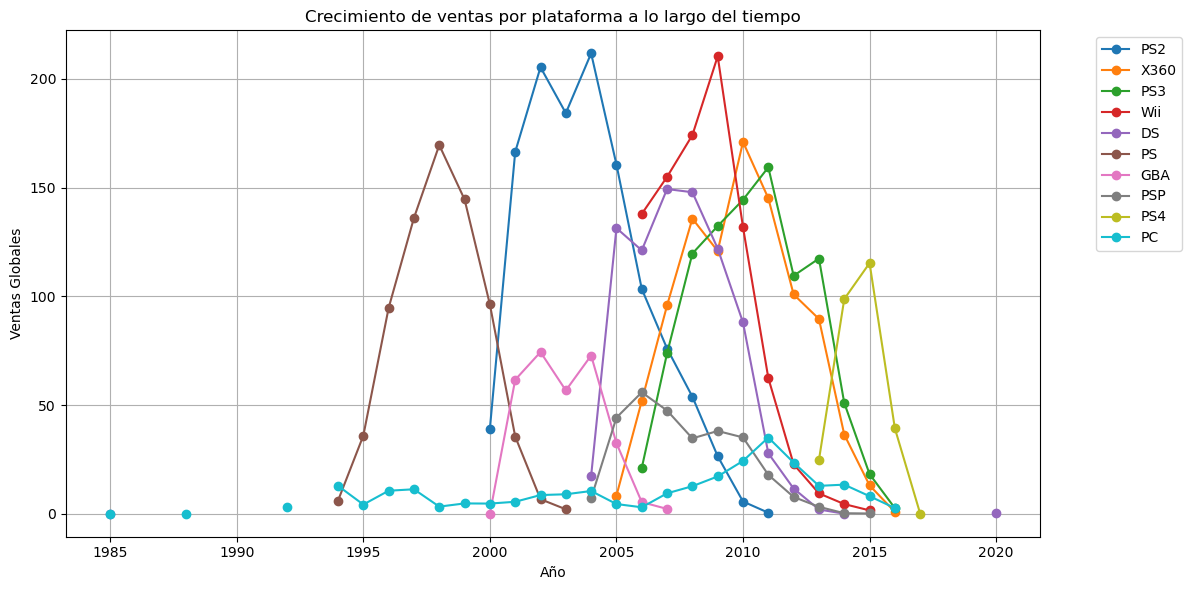

In [ ]:
# Calculo total por ventas
platform_total = platform_sales.sum(axis=1).sort_values(ascending=False)

# Obtenemos el top 10 de plataformas por ventas
top_10_platforms = platform_total.head(10)

# Creamos el plot line
plt.figure(figsize=(12, 6))
for platform in top_10_platforms.index:
    plt.plot(platform_sales.columns, platform_sales.loc[platform], label=platform, marker='o')

plt.title('Crecimiento de ventas por plataforma a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Ventas Globales')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

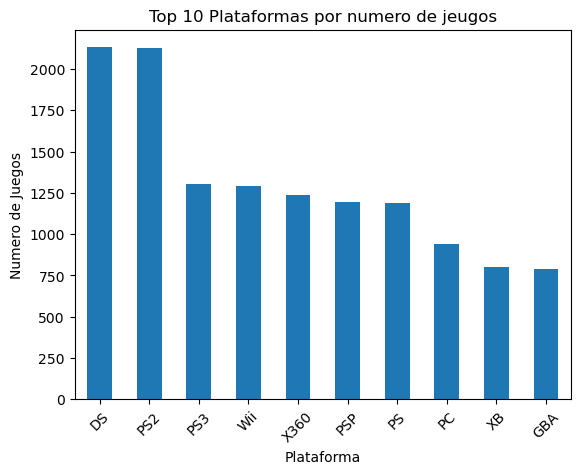

In [ ]:
fig, ax1 = plt.subplots()

# Plot 1: Top 10 Plataformas por numero de juegos
plat_games.head(10).plot(kind='bar', ax=ax1)
ax1.set_title('Top 10 Plataformas por numero de juegos')
ax1.set_xlabel('Plataforma')
ax1.set_ylabel('Numero de Juegos')
ax1.tick_params(axis='x', rotation=45)

plt.show()

#### Analisis Correlacional

In [ ]:
pvt_platform_genre = pd.crosstab(df['Platform'], df['Genre'])


fig, axes = plt.subplots()
fig.suptitle('Analisis de Correlacion: Plataformas-Genero', fontsize=16)

sns.heatmap(pvt_platform_genre.corr(), annot=False, cmap='coolwarm')

In [ ]:
pvt_platform_publisher = pd.crosstab(df['Platform'], df['Publisher'])
fig, axes = plt.subplots()
fig.suptitle('Analisis de Correlacion: Plataformas-Publisher', fontsize=16)

top_publishers = df['Publisher'].value_counts().nlargest(20).index
pvt_platform_publisher = pvt_platform_publisher[top_publishers]
sns.heatmap(pvt_platform_publisher.corr())

In [ ]:
pvt_genre_publisher = pd.crosstab(df['Genre'], df['Publisher'])
fig, axes = plt.subplots()
fig.suptitle('Analisis de Correlacion: Publisher-Genero', fontsize=16)

pvt_genre_publisher = pvt_genre_publisher[top_publishers]
sns.heatmap(pvt_genre_publisher.corr(), annot=False, cmap='coolwarm')


In [ ]:
sns.displot(df['NA_Sales'], kde=False)
sns.displot(df['EU_Sales'], kde=False)
sns.displot(df['JP_Sales'], kde=False)
sns.displot(df['Other_Sales'], kde=False)

#### Analisis Bivariado

In [146]:
# Numero de lanzamientos por generos y plataformas
bi_analyst = pd.crosstab(df['Genre'], df['Platform'])
bi_analyst

Platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
Genre,,,,,,,,,,,,,,,,,,,,,
Action,55,0,180,3,335,6,162,98,3,0,...,3,0,12,0,0,230,63,318,152,68
Adventure,1,1,36,11,238,5,36,20,2,0,...,26,0,4,1,0,83,3,47,26,12
Fighting,1,0,14,12,36,0,23,42,5,0,...,31,0,25,0,0,41,5,65,44,7
Misc,5,0,53,0,389,8,86,35,1,0,...,15,2,17,0,0,272,21,122,45,15
Platform,9,0,28,2,89,18,139,73,7,1,...,5,1,26,0,0,57,16,24,49,4
Puzzle,8,1,19,0,236,15,39,12,0,0,...,5,0,13,0,0,54,4,6,7,0
Racing,4,0,10,6,66,2,64,60,1,0,...,8,1,9,0,0,92,3,102,122,19
Role-Playing,0,0,85,4,196,21,73,25,3,0,...,17,1,50,0,4,35,6,75,23,13
Shooter,22,0,6,3,42,1,40,48,1,0,...,22,0,10,1,0,61,10,197,124,33


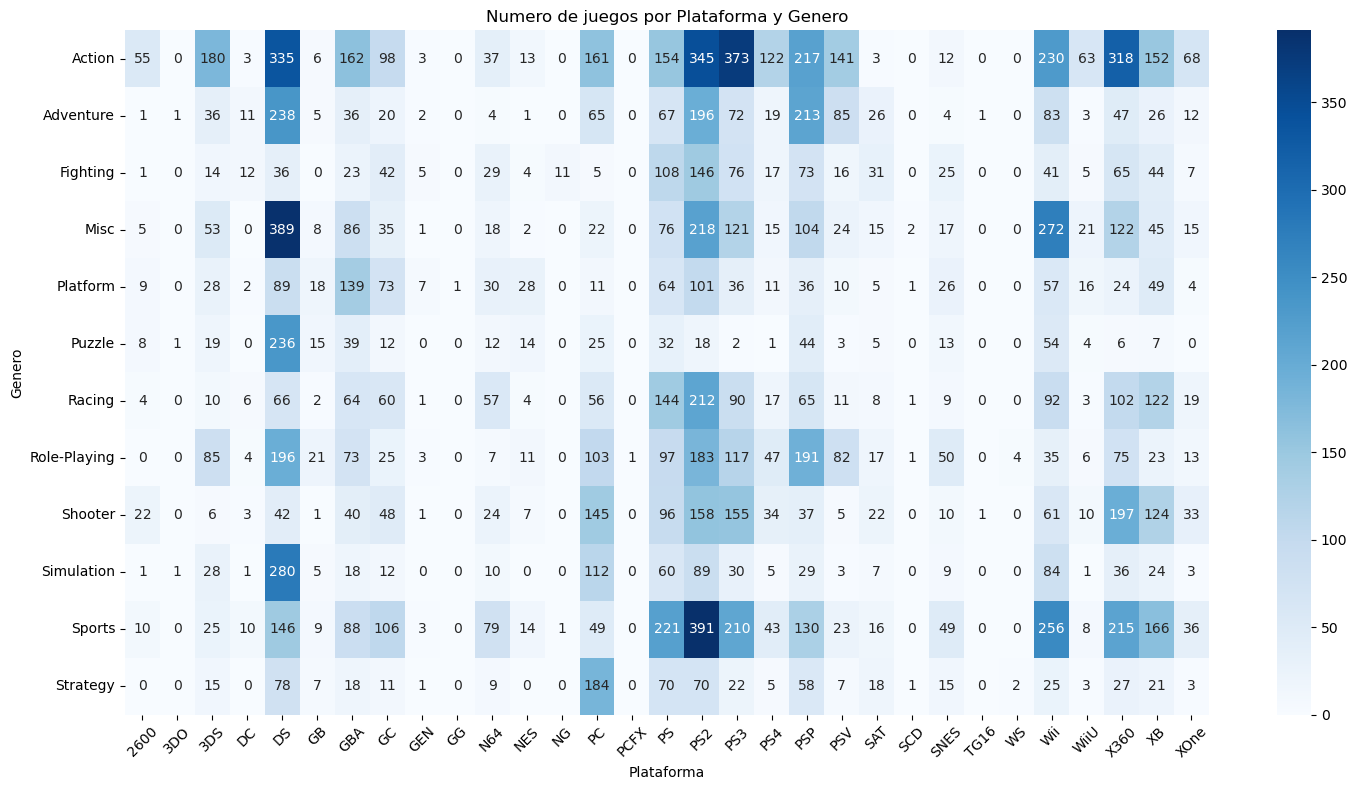

In [ ]:
# Grafcio de Numero de juegos por Plataforma y Gener
# Tabla Pivot
pivot_genre_platform_count = pd.pivot_table(df, values='Name', index='Genre', columns='Platform', aggfunc='count', fill_value=0)

# Creacion del heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(pivot_genre_platform_count, cmap='Blues', annot=True, fmt='g')
plt.title('Numero de juegos por Plataforma y Genero')
plt.xlabel('Plataforma')
plt.ylabel('Genero')
plt.xticks(rotation=45)
plt.tight_layout()

#### Insigths
- Los videojuegos de acction han sido de los mas lanzados y jugados
- Siendo los de puzzle los menos lanzados
- La PS2 fue una de las consolas con mayor rango de crecimiento de su epoca, siendo unicamente alcanzada por la Wii unos año despues
- La plataforma de PC tuve un aumento en sus jugadores desde el año de 2007
- La Nintendo DS y PS2, son de las platafromas con mas juegos lanzados

### Ventas
1) Total de ventas por año,
    
2) Juegos más vendidos por año,
    
3) Plataformas con más ingresos por año. 

In [ ]:
# Tabla pivot
pivot_genre_platform = pd.pivot_table(df, values='Global_Sales', index='Genre', columns='Platform', aggfunc='sum',fill_value=0)

# Creacion de heat,ap
plt.figure(figsize=(15, 8))
sns.heatmap(pivot_genre_platform, cmap='YlOrRd', annot=True, fmt='.1f')
plt.title('Total de ventas por Plataforma y Genero')
plt.xlabel('Plataforma')
plt.ylabel('Genero')
plt.xticks(rotation=45)
plt.tight_layout()

In [ ]:
# 1. Sales correlation by region
sales_correlation = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].corr()

# 2. Platform and Genre correlation based on sales
platform_genre_sales = pd.pivot_table(df, 
                                    values='Global_Sales', 
                                    index='Platform', 
                                    columns='Genre', 
                                    aggfunc='sum')

# Create the plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Sales correlation heatmap
sns.heatmap(sales_correlation, 
            annot=True, 
            cmap='YlGnBu', 
            ax=ax1)
ax1.set_title('Sales Correlation by Region')

# Platform-Genre correlation heatmap
sns.heatmap(platform_genre_sales, 
            annot=True, 
            fmt='.1f', 
            cmap='YlOrRd', 
            ax=ax2)
ax2.set_title('Platform-Genre Sales Correlation')
plt.xticks(rotation=45)

plt.tight_layout()

### Lanzamientos por Publisher
1) Numero total de lanzamientos por Publisher

2) Ventas totales por Publisher

3) Numero de lanzamientos por año

In [ ]:
# Numero de Videojuegos lanzados poir publisher
num_lanzamientos = df.groupby('Publisher')['Publisher'].count().rename('Num de Lanzamientos')
num_lanzamientos

In [ ]:
# Publishers con mas lanzamientos
num_lanzamientos.sort_values(ascending=False).head(10)

In [ ]:
num_lanzamientos.sort_values(ascending=False).head(10).plot.bar()

In [ ]:
# Numero de ventas globales por Publisher
sales_publ = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).round(2)
sales_publ.head(10)

In [ ]:
sales_publ.head(10).plot.bar()

In [79]:
# Numero de lanzamientos por año
year_publ = pd.pivot_table(df, values='Name', index='Publisher', columns='Year', aggfunc='count', fill_value=0)

year_publ['Total'] = year_publ.sum(axis=1)
year_publ = year_publ.sort_values('Total', ascending=False)

year_publ.head(10)

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2010,2011,2012,2013,2014,2015,2016,2017,2020,Total
Publisher,,,,,,,,,,,,,,,,,,,,,
Electronic Arts,0,0,0,0,0,0,0,0,0,0,...,88,76,46,42,36,32,20,0,0,1339
Activision,5,6,4,3,1,2,0,2,2,1,...,89,75,42,38,42,39,14,0,0,966
Namco Bandai Games,0,0,0,0,3,2,2,2,2,1,...,70,76,85,63,69,68,40,0,0,928
Ubisoft,0,0,0,0,0,0,0,0,0,0,...,72,87,32,29,44,32,13,0,1,918
Konami Digital Entertainment,0,0,0,0,0,0,4,1,0,1,...,68,44,32,16,18,12,8,0,0,823
THQ,0,0,0,0,0,0,0,0,0,0,...,57,76,8,1,0,0,0,0,0,712
Nintendo,0,0,0,6,9,7,6,4,6,9,...,28,26,31,23,20,32,10,0,0,696
Sony Computer Entertainment,0,0,0,0,0,0,0,0,0,0,...,43,36,24,12,13,10,5,0,0,682
Sega,0,0,1,0,0,0,0,0,0,0,...,39,35,25,17,23,10,8,2,0,632


In [ ]:
year_publ.head(10).plot.bar()

#### Insigths

- Entre el año 2008 y 2009, fue donde mas lanzamientos se realizaron por parte de todos los publisher
- Siendo Electronic Arts(EA), la mayor publisher antes las demas, con un total de 1339, desde el año de 1980 al 2020

# Tabla de referencia

In [32]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01
